<img src="https://cs7.pikabu.ru/post_img/2014/03/10/4/1394427243_1353289544.jpg" height="400" width="400"> 

# <center> ML для маркетинга. <br>  <br> Cюжетная арка 2: отток и привлечение </center>

В этом семестре мы с вами пройдём через несколько сюжетных арок. Второй такой аркой будут отток и привлечение. Им будет посвящена вторая серия из семинаров и домашек. 


#  Часть II (Две модели) 

В этой тетрадке мы с вами разбирались что такое логистическая регрессия и как её нужно готовить. 

## 1. Подгружаем данные

In [1]:
import pandas as pd

In [2]:
# подгрузим приготовленные на прошлом семинаре данные
df = pd.read_csv('churn_train.csv', sep='\t')

# вытащим переменную, которую мы будем прогнозировать (y=1 означает, что человек ушёл)
y = df['Churn'].astype(int).get_values()
y

array([0, 1, 0, ..., 0, 0, 0])

In [3]:
# вытаскиваем то, по чему мы будем строить прогнозы 
X = df.drop('Churn', axis=1).get_values()
X

array([[ 82. ,   0. , 125.7, ...,   0. ,   0. ,   1. ],
       [ 97. ,   0. , 120.8, ...,   0. ,   0. ,   1. ],
       [171. ,   0. , 189.8, ...,   0. ,   0. ,   1. ],
       ...,
       [ 87. ,  22. , 240.8, ...,   0. ,   1. ,   0. ],
       [101. ,  42. , 209.2, ...,   0. ,   1. ,   0. ],
       [ 79. ,  32. ,  50.6, ...,   0. ,   1. ,   0. ]])

In [5]:
from sklearn.model_selection import train_test_split

# разобьём выборку на тренировочную и валидационную 
# на валидации мы впоследствии будем сравнивать разные модели между собой
Xtr, Xval, ytr, yval = train_test_split(X,y, test_size=0.2,
                                           stratify=y)  # для сбалансированности

In [6]:
# под сбалансированностью имеется в виду, что и в трейне и в валидации
# целевой переменной (её мы прогнозируем) одинаковый процент
sum(ytr == 1)/len(ytr), sum(yval == 1)/len(yval)

(0.1449343339587242, 0.1441947565543071)

## 2.  Глупости с обычной регрессией

In [7]:
# давайте попробуем оценить регрессию! 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtr, ytr)
# model.coef_  # коэффициенты появились после обучения

# О, нет! получаются не 0 и 1 ((((
# а нам нужны именно они! 
model.predict(Xval)[:10]

array([ 0.10541388,  0.16881326, -0.00751623,  0.08294608,  0.34474741,
        0.03897214,  0.29134145,  0.47282142,  0.2214461 ,  0.15443971])

## 3. Оцениваем логичтисескую регрессию 

In [8]:
# переделаем все в логистическую регрессию! 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(Xtr, ytr)
model.coef_  # коэффициенты появились после обучения

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 1.99007371e-04,  1.44626436e-02,  1.09693019e-02,
        -3.25149806e-03,  2.31562743e-05,  5.70136237e-03,
         6.88612937e-04,  6.97821759e-04,  3.97786562e-03,
        -5.49338909e-03, -2.09934296e-02,  3.20008843e-02,
        -8.22319953e-02,  6.55191851e-03,  4.27064024e-01,
        -4.62656033e-01, -8.20537657e-03, -5.32463218e-02,
        -3.13939895e-01, -1.00831405e-01,  1.86518335e-01,
         1.26894448e-01,  3.74449032e-01,  1.88446622e-03,
         2.03586565e-01,  6.18441264e-01, -2.06092148e-01,
         6.03411623e-01,  1.68473872e-01, -1.54038364e-01,
        -4.54386916e-02, -2.35128530e-01, -1.04541480e+00,
         7.96721689e-01, -5.05928896e-02, -1.29801679e+00,
        -5.70100536e-01,  5.58299651e-01, -4.66661231e-01,
        -5.63102636e-01, -5.18801491e-01, -2.99787206e-01,
        -1.47817766e-01, -1.35900162e-01,  2.08206586e+00,
        -2.58837209e+00, -1.48507622e+00]])

In [9]:
# ура! теперь у нас нули и единицы
model.predict(Xval)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 4. Картинка с коэффициентами

In [10]:
# имена колонок из нашей таблички 
features = list(df.drop('Churn', axis=1).columns)

# значения коэффициентов, получившиеся после оценки модели
coefs = model.coef_[0]

In [11]:
# 47 переменных и 47 коэффициентов
len(features), len(coefs)

(47, 47)

In [12]:
# закинем коэффициенты и их названия в табличку
df_coef = pd.DataFrame(coefs, features)
df_coef.head()

,0
Account length,0.000199
Number vmail messages,0.014463
Total day minutes,0.010969
Total day calls,-0.003251
Total day charge,0.000023


In [13]:
# отсортируем табличку по значению коэффициентов
df_coef.sort_values(0) # в скобках название колонки

,0
Voice mail plan_Yes,-2.588372
Zero vmail messages,-1.485076
State_VA,-1.298017
State_RI,-1.045415
State_VT,-0.570101
State_WV,-0.563103
State_WY,-0.518801
State_WI,-0.466661
State_CO,-0.462656
State_IN,-0.313940


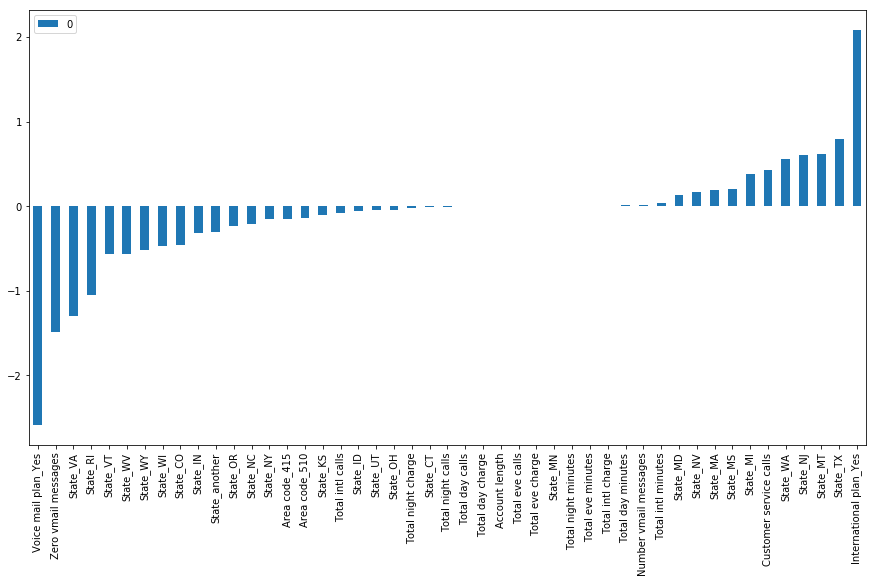

In [15]:
# нарисуем barplot 
df_coef.sort_values(0).plot(kind='bar', figsize=(15,8));

## 5. Качество модели и прогнозы

In [16]:
# в первой колонке P(y=0)
# во второй колонке P(y=1)
model.predict_proba(Xval)

array([[0.93946207, 0.06053793],
       [0.8664778 , 0.1335222 ],
       [0.96567505, 0.03432495],
       ...,
       [0.95826009, 0.04173991],
       [0.94960427, 0.05039573],
       [0.46129801, 0.53870199]])

In [19]:
p_pred = model.predict_proba(Xval)
p_pred[:10]

array([[0.93946207, 0.06053793],
       [0.8664778 , 0.1335222 ],
       [0.96567505, 0.03432495],
       [0.92876485, 0.07123515],
       [0.63538027, 0.36461973],
       [0.96045562, 0.03954438],
       [0.71295965, 0.28704035],
       [0.57185261, 0.42814739],
       [0.80772955, 0.19227045],
       [0.91609187, 0.08390813]])

In [20]:
# можно достать только P(y=1)
p_pred[:,-1][:10]

array([0.06053793, 0.1335222 , 0.03432495, 0.07123515, 0.36461973,
       0.03954438, 0.28704035, 0.42814739, 0.19227045, 0.08390813])

In [21]:
# можно спрогнозировать либо 0 либо 1 
# если P(y=1) > 0.5 иначе ставит 0 
model.predict(Xval)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
from sklearn.metrics import log_loss

# можно найти logloss 
log_loss(yval, p_pred[:,-1])

0.31953946971811004

In [23]:
# можно считать другме метрики! 
from sklearn.metrics import roc_auc_score, accuracy_score

# например roc_auc
roc_auc_score(yval, p_pred[:,-1])

0.8369945153314957

In [24]:
# или accuracy 
y_pred = model.predict(Xval)
accuracy_score(yval, y_pred)

0.8558052434456929

In [ ]:
# Что такое ROC_AUC никто не вспомнил! 
# Придется почитать pdf из прошлого семестра!!!